In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon, norm

In [7]:
def simulation(N0, M, p):
    S = np.zeros((M, N0))
    S[0,:] = np.ones(N0)
    for i in range(1, M):
        S[i, :] = S[i-1, :]
        aux = np.random.random(N0)
        idx = np.where(aux < p)[0]
        S[i, idx] = 0
    return S

In [20]:
N0 = 10000
M = 10000
p = .002

S = simulation(N0, M, p)

N = np.sum(S, axis=1)
A = np.sum(S, axis=0)

Text(0, 0.5, 'Population ($N$)')

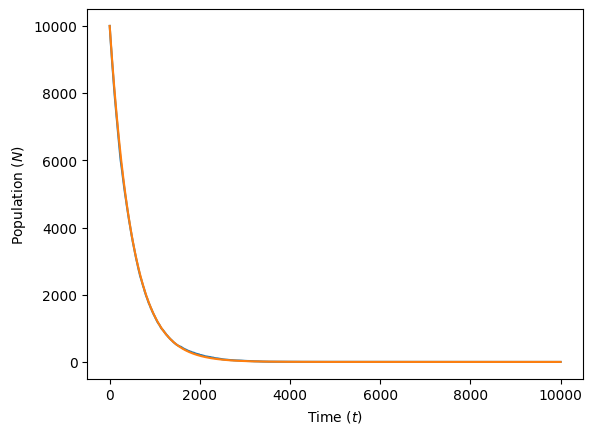

In [21]:
plt.plot(N)
plt.plot(np.arange(M), N0*np.exp(-p*np.arange(M)))
plt.xlabel(r"Time ($t$)")
plt.ylabel(r"Population ($N$)")

Text(0, 0.5, 'Population ($N$)')

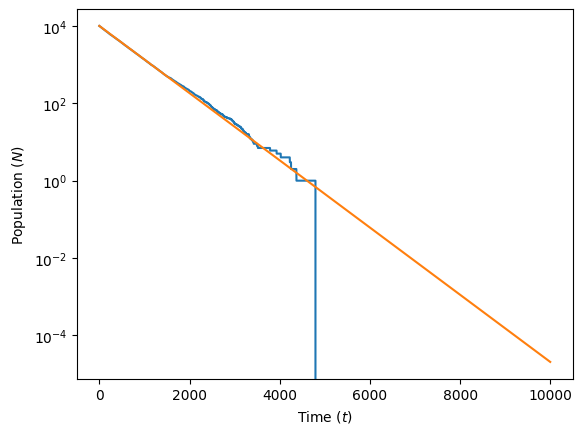

In [22]:
plt.semilogy(N)
plt.semilogy(np.arange(M), N0*np.exp(-p*np.arange(M)))
plt.xlabel(r"Time ($t$)")
plt.ylabel(r"Population ($N$)")

Text(0, 0.5, 'Longevity')

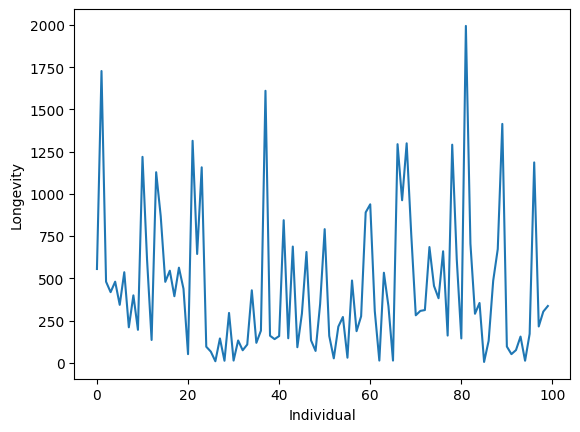

In [23]:
plt.plot(A[:100])
plt.xlabel("Individual")
plt.ylabel("Longevity")

In [24]:
np.mean(A), 1/p

(np.float64(499.4572), 500.0)

Text(0, 0.5, 'Probability Density Function')

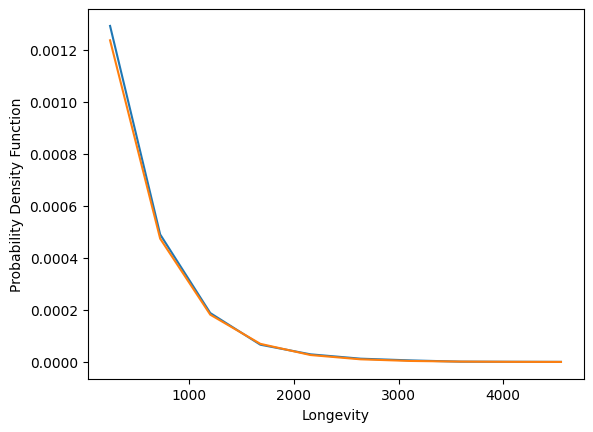

In [25]:
freqs, bins = np.histogram(A)
pdf = freqs / sum(freqs) / np.diff(bins)
mid_bins = (bins[1:] + bins[:-1])/2

plt.plot(mid_bins, pdf)
plt.plot(mid_bins, p*np.exp(-p*mid_bins))
plt.xlabel("Longevity")
plt.ylabel("Probability Density Function")

Text(0, 0.5, 'Probability Density Function')

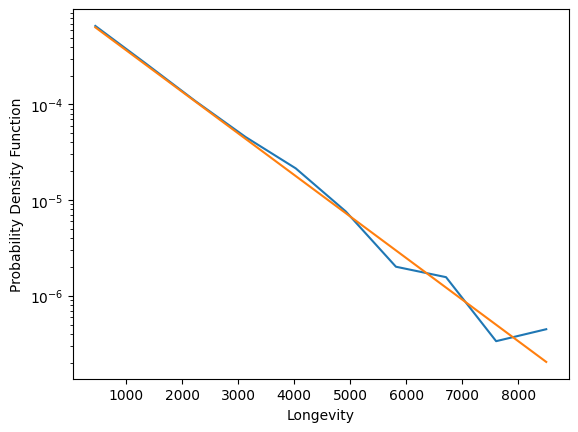

In [9]:
freqs, bins = np.histogram(A)
pdf = freqs / sum(freqs) / np.diff(bins)
mid_bins = (bins[1:] + bins[:-1])/2

plt.semilogy(mid_bins, pdf)
plt.semilogy(mid_bins, p*np.exp(-p*mid_bins))
plt.xlabel("Longevity")
plt.ylabel("Probability Density Function")

In [26]:
def simulation2(N0, M, p):
    ages = expon.rvs(scale=1/p, size=N0)
    N = np.zeros(M)
    for i in range(M):
        N[i]=len(np.where(ages > i)[0])
    return(N)

Text(0, 0.5, 'Population ($N$)')

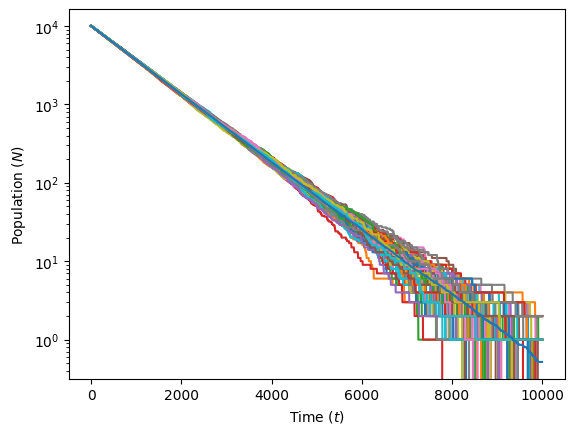

In [27]:
N0 = 10000
M = 10000
p = .001

Navg = np.zeros(M)
for i in range(100):
    N = simulation2(N0, M, p)
    plt.semilogy(N)
    Navg = Navg + N
Navg = Navg / 100

plt.semilogy(Navg)
plt.xlabel(r"Time ($t$)")
plt.ylabel(r"Population ($N$)")

In [2]:
def simulation3(N0, M, p):
    ages = norm.rvs(loc=1/p, scale=1/p, size=N0)
    N = np.zeros(M)
    for i in range(M):
        N[i]=len(np.where(ages > i)[0])
    return(N)

Text(0, 0.5, 'Population ($N$)')

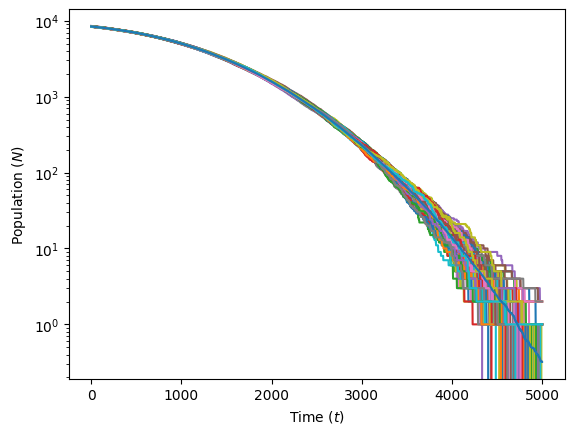

In [3]:
N0 = 10000
M = 5000
p = .001

Navg = np.zeros(M)
for i in range(100):
    N = simulation3(N0, M, p)
    plt.semilogy(N)
    Navg += N
Navg /= 100

plt.semilogy(Navg)
plt.xlabel(r"Time ($t$)")
plt.ylabel(r"Population ($N$)")